# Кластеризация и PCA

In [ ]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA # Метод главных компонент
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler  # z-нормировка
# from sklearn.preprocessing import MinMaxScaler, RobustScaler # другие способы нормировки

import seaborn as sns # 2D-визуализация
import plotly.express as px # 3D-визуализация

In [ ]:
df = pd.read_csv('./datasets/Countries.csv')
# Удалим нечисловые переменные
X = df.drop(columns=['Страны'])

## Нормирование данных

In [3]:
# Специфицируем метод нормировки
scaler = StandardScaler(with_mean=True, with_std=True)
# scaler = MinMaxScaler()
# scaler = RobustScaler()

X_norm = scaler.fit_transform(X)

## Выделение главных компонент

Выделим первые 4 главные компоненты

In [6]:
pc = PCA(n_components=4)

X_pca = pc.fit_transform(X_norm)

X_pca = pd.DataFrame(data=X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [7]:
# Специфицируем процедуру
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward', compute_full_tree=True)
# проводим кластеризацию
cl = cluster.fit_predict(X_pca)
cl

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
X['Cluster'] = cl
X_pca['Cluster'] = cl

<Axes: xlabel='ИРЧП', ylabel='Население'>

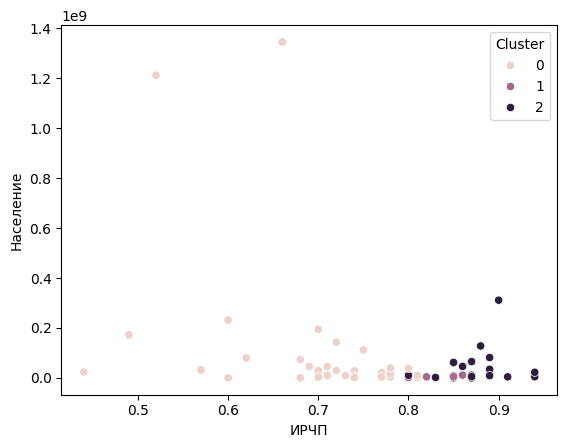

In [9]:
sns.scatterplot(data=X, x='ИРЧП', y='Население', hue='Cluster')

<Axes: xlabel='PC1', ylabel='PC2'>

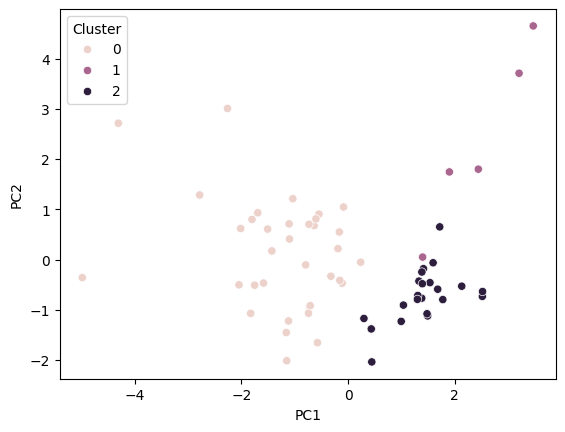

In [11]:
sns.scatterplot(data=X_pca, x='PC1', y='PC2', hue='Cluster')